In [8]:
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [95]:
planet_mass = 5 * u.M_earth.to(u.M_sun)
planet_ecc = 0.01
planet_radius = 2.5 * u.R_earth.to(u.AU)
planet_mass, planet_radius

(1.5017446744253966e-05, 0.00010658741281135093)

In [96]:
# set up rebound
sim = rebound.Simulation()
sim.G = 1.
sim.add(m=1., hash="star")
sim.add(m=planet_mass, a=0.17, 
        e=planet_ecc, r=planet_radius, hash="p1")
sim.add(m=planet_mass, a=0.23,
        e=planet_ecc, r=planet_radius, hash="p2")
sim.move_to_com()

# using WHFast with planet period = planet period / 12.134
ps = sim.particles
sim.integrator = "whfast"
sim.dt = ps[1].P / 12.1234

# add migration forces with characteristic timescales
rebx = reboundx.Extras(sim)
mof = rebx.load_force("modify_orbits_forces")
τ1 = 5. * u.Myr.to(u.yr) * (2 * np.pi)
τ2 = τ1 / 1.1
ps[1].params["tau_a"] = -τ1
ps[2].params["tau_a"] = -τ2
rebx.add_force(mof)

In [97]:
# integrate until 4 millions years
tmax = 4e6

# set up arrays to store orbital elements
# 2 pi factors are to convert from yr to yr/2pi units
t_arr = np.linspace(0., 2e6 * (2*np.pi), 100)

# storing semimajor axis, eccentricity, and inclination
a = np.zeros((100,2))
ecc = np.zeros((100,2))
inc = np.zeros((100,2))

for i, t in enumerate(t_arr):
    sim.integrate(t)
    
    ps = sim.particles
    a[i] = [ps[1].a, ps[2].a]
    ecc[i] = [ps[1].e, ps[2].e]
    inc[i] = [ps[1].inc, ps[2].inc]

0.0 0.0
126933.0365086785 0.0101010101010101
253866.073017357 0.0202020202020202
380799.1095260355 0.0303030303030303
507732.146034714 0.0404040404040404
634665.1825433925 0.050505050505050504
761598.219052071 0.0606060606060606
888531.2555607496 0.0707070707070707
1015464.292069428 0.0808080808080808
1142397.3285781066 0.09090909090909091
1269330.365086785 0.10101010101010101
1396263.4015954635 0.1111111111111111
1523196.438104142 0.1212121212121212
1650129.4746128204 0.1313131313131313
1777062.5111214991 0.1414141414141414
1903995.5476301776 0.15151515151515152
2030928.584138856 0.1616161616161616
2157861.6206475347 0.17171717171717174
2284794.657156213 0.18181818181818182
2411727.6936648916 0.19191919191919193
2538660.73017357 0.20202020202020202
2665593.7666822486 0.21212121212121213
2792526.803190927 0.2222222222222222
2919459.8396996055 0.23232323232323232
3046392.876208284 0.2424242424242424
3173325.9127169624 0.2525252525252525
3300258.949225641 0.2626262626262626
3427191.98573

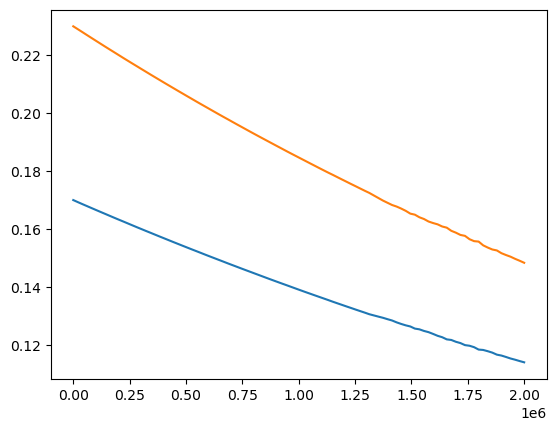

In [104]:
plt.plot(t_arr / (2*np.pi), a[:,0])
plt.plot(t_arr / (2*np.pi), a[:,1])

# plt.ylim([0., 0.25])

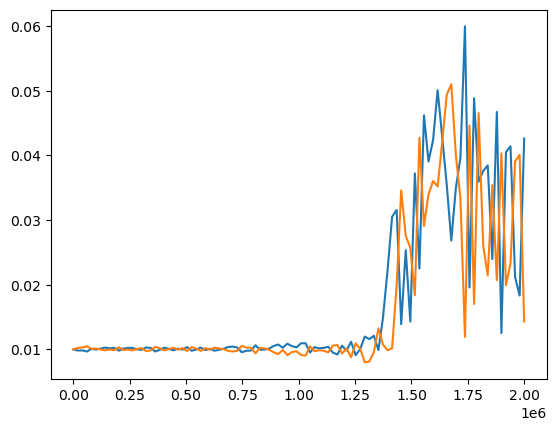

In [102]:
plt.plot(t_arr / (2*np.pi), ecc[:,0])
plt.plot(t_arr / (2*np.pi), ecc[:,1])